In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# read uploaded files
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train = pd.DataFrame(train)
test = pd.DataFrame(test)

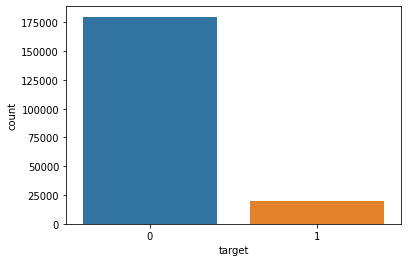

In [0]:
#see how many 0 and 1 in the given train file
sns.countplot(x=train["target"])

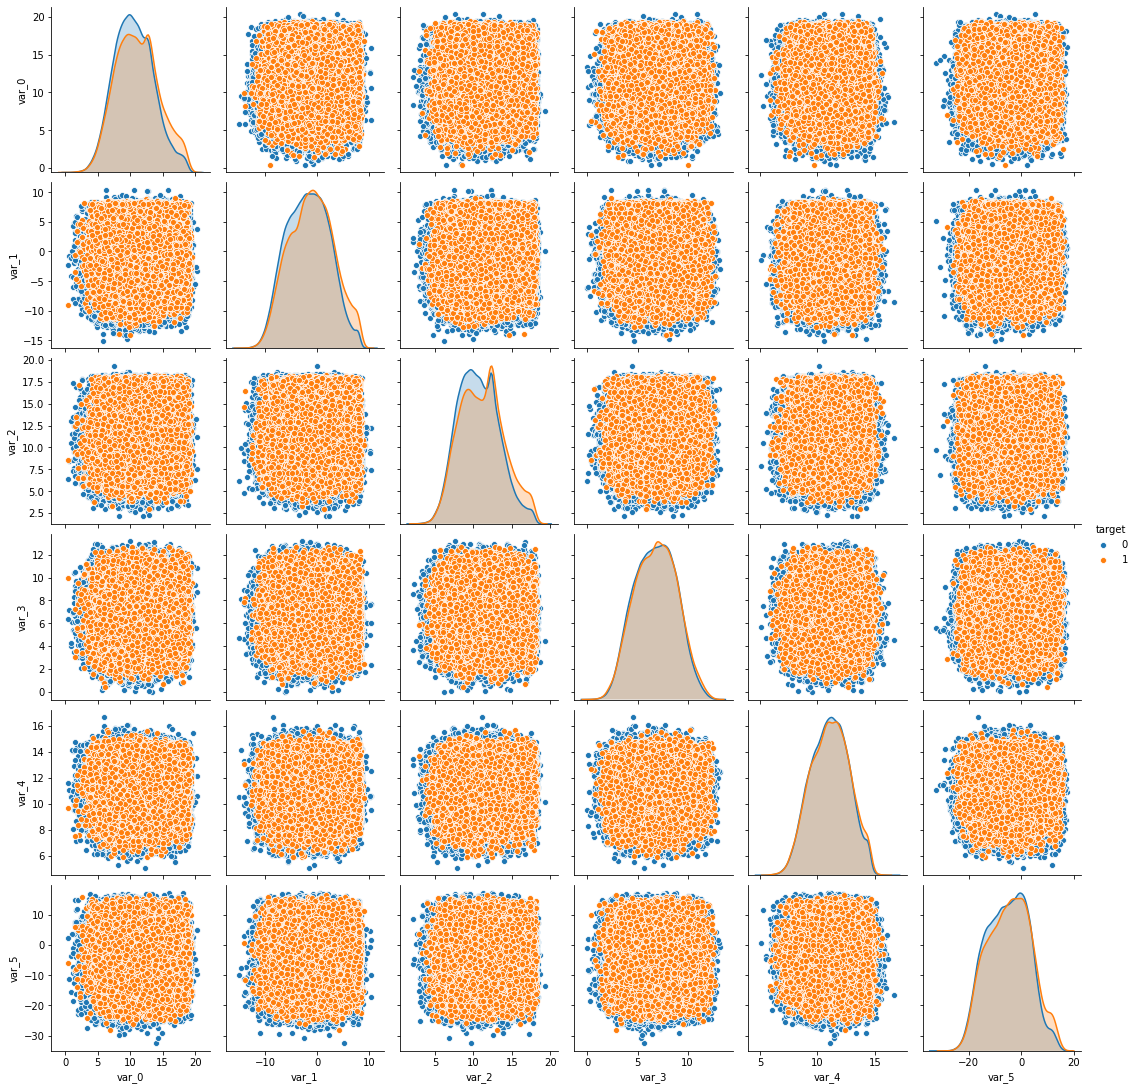

In [0]:
# see the comparision of customer(0) and customer(1) under the same variable
# due to the large data, I only did var_0 to var_5
sns.pairplot(train, hue="target")

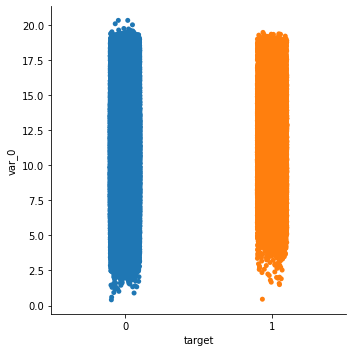

In [0]:
# distribution (cat plot) of customers(0/1) for a single variable (var_0 - var_199)
sns.catplot(x="target", y="var_0", data=train)

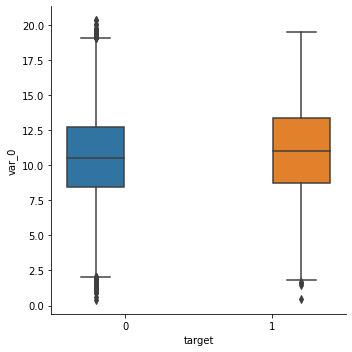

In [0]:
# distribution (box plot) of customers(0/1) for a single variable (var_0 - var_199)
sns.catplot(x="target", y="var_0", hue="target", kind="box", data=train)

In [0]:
train.isnull().sum()
# the data is high in quelity, no missing data in train file

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [0]:
test.isnull().sum() 
# the data is high in quality, no missing data in test file

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [0]:
def generate_submission (df, target, filename):
  fil= df.loc[:,["ID_code", target]]
  fil.rename(columns={target:"target"}, inplace = True)
  fil.to_csv(filename, index = False)
  return fil

In [0]:
# Model 1: Naive model
# This model assumes that every customer is 0 (will not make the transaction)

train["PredAll0"] = 0

def generate_accuracy (predicted, actual):
  """
  Calculate the accuracy of prediction values.
  """
  correct_number = 0
  for i in range(len(predicted)):
    if predicted[i] == actual[i]:
      correct_number +=1
  accuracy = correct_number / len(predicted)
  return accuracy

generate_accuracy(train.loc[:,"PredAll0"],train.loc[:,"target"])

#The accuracy fot the naive model is 0.89951

0.89951

In [0]:
# create submission file for kaggle
test["PredAll0"] = 0
generate_submission(test, "PredAll0", "naive.csv")

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [0]:
#Model 2: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = train.iloc[:,2:202]
y = train["target"]

classifier2 = LogisticRegression(max_iter=300)  # use logistic regression model
model2 = classifier2.fit(X, y)
predict_y = model2.predict(X)
metrics.accuracy_score(y, predict_y)
# The accuracy for the logistic regression is 0.91386

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.91386

In [0]:
# Apply logistic regression model and create submission file for kaggle
pre_2 = model2.predict(test.iloc[:,1:201])
test["lr"] = pre_2
generate_submission(test, "lr", "logistic.csv")

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [0]:
# Model 3: Random Forest Regression 
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
model3 = classifier3.fit(X,  y)

y_pred = model3.predict(X)
metrics.accuracy_score(y, y_pred)
# The accuracy for random forest is 0.99999

0.99999

In [0]:
# create submission file for kaggle
test["rf"]= model3.predict(test.iloc[:,1:201])
generate_submission(test, "rf", "rf.csv")

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [0]:
"""
Ge Yan
RIN: 661931789
"""

'\nGe Yan\nRIN: 661931789\n'

In [0]:
from google.colab import files
files.download('rf.csv') 